<h1><center>DSA 4212: Year 2022</center></h1>
<h3><center> Assignment 1 (Deadline: Sunday 27th March at 23:59) </center></h3>
<h4><center> Group Number: 12 </center></h4>
<h4><center> Filename: assignment_1_12.ipynb </center></h4>
<h4><center> Group Member 1: Chua Xin Xuan, A0205767X </center></h4>
<h4><center> Group Member 2: Joey Tan Xin Yi, A0206334N </center></h4>
<h4><center> Group Member 3: Quek Su Ning, A0205557A </center></h4>
<h4><center> Group Member 4: Tan Jie Yi, A0206383H </center></h4>

**Remark:** as described below, each group has to submit two documents on lumiNUS: 
1. a jupyter notebook with your code  
2. a pdf report explaining your approaches and conclusions.
3. you can have a look at `https://www.overleaf.com/read/xmvqgpsdqwyx` if you would like to use Overleaf and Latex to rapidly produce a neat report. You can use your NUS email to create an Overleaf account.

**File naming convention:**
1. the Jupyter notebook needs to be named `assignment_1_XX.ipynb`. For example, group number 3 needs to name its jupyter notebook as `assignment_1_03.ipynb`.
1. the pdf report needs to be named `assignment_1_XX.pdf`. For example, group number 3 needs to name its pdf report as `assignment_1_03.pdf`.



In [2]:
%matplotlib inline
from jax.config import config
config.update("jax_enable_x64", True) # for higher accuracy

import jax
import jax.numpy as jnp

import pylab as plt
import imageio
import os
import cv2
import pandas as pd
import numpy as np
# to install scikit-image: !pip install scikit-image
from skimage.util import random_noise
from skimage.transform import rescale, rotate, resize, downscale_local_mean
from sklearn import metrics
#from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Data Dowload
1. Download the "celeba_small.zip" file available on lumiNUS.
This is a 146Mo large zip-file containing 20K face images.
2. Download the attribute file "celeba.csv" available on lumiNUS.
3. Unzip the file "celeba_small.zip" in the directory of your choice. (Data = 175 Mo when uncompressed). 


# Brief Data exploration

In [3]:
#load attributes csv file
path_csv  = "/Users/suningquek/Documents/Y3S2/DSA4212/Datasets"
attribute = pd.read_csv(os.path.join(path_csv, "celeba.csv"))

In [4]:
#"attribute" is a dictionary containing several attributes for each image
attribute.keys()

Index(['Filename', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

In [5]:
len(attribute)
attribute[20000:] # attributes of images not given
#attribute['Arched_Eyebrows'][0:5]

,Filename,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
20000,020001.jpg,-1,1,1,1,-1,-1,-1,1,-1,...,-1,-1,-1,-1,1,-1,1,1,-1,1
20001,020002.jpg,-1,-1,-1,-1,1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,1,-1
20002,020003.jpg,-1,-1,1,-1,-1,1,-1,-1,-1,...,-1,-1,1,-1,1,-1,-1,-1,-1,1
20003,020004.jpg,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
20004,020005.jpg,1,-1,-1,1,-1,-1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,...,-1,1,-1,1,1,-1,1,-1,-1,1


In [6]:
#let us list all the files in the image directory
path = "/Users/suningquek/Documents/Y3S2/DSA4212/Datasets/img_celeba_small"
all_img = [f for f in os.listdir(path) 
                 if os.path.isfile(os.path.join(path, f)) 
                 and f.endswith(".jpg")]

# sort the images by alphabetical order 
# !!!! VERY IMPORTANT in order to be consistent with the labels contained in celeba.csv !!!!
all_img.sort()
nb_img = len(all_img)
print("Number of images:", nb_img)

#let us keep only the relevant attributes
attribute = attribute[:20000]

Number of images: 20000


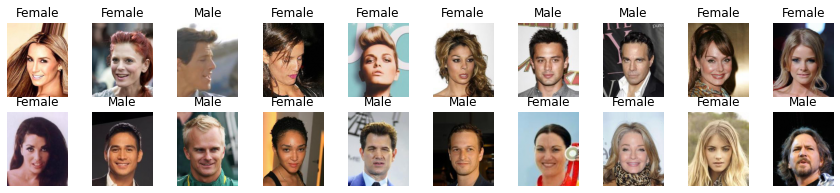

In [7]:
#let us display the first 20 images
# !!! MAKE SURE THAT THE LABELS ARE CORRECT !!!
plt.figure(figsize=(15,3)) # (15,3) is the dimensions of the pic
for k in range(20):
    #load image
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    #resize to 100x100 for display (you do not have to do this in the assignment)
    #im = resize(im, (100,100) )
    #scale pixel intensity to [0,1] by dividing by 255 and display
    plt.subplot(2,10,k+1)
    plt.imshow(im/255.)
    plt.axis("off")
    
    is_male = attribute["Male"][k]
    if is_male == 1:
        plt.title("Male")
    else:
        plt.title("Female")
    

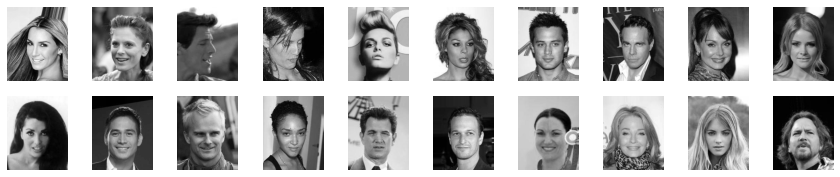

In [8]:
#let us display the first 20 images in black and white
plt.figure(figsize=(15,3))
for k in range(20):
    #load image
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    #resize to 100x100
    #im = resize(im, (100,100) )
    
    #transform to black and white by averaging the 3 color channels
    im = np.mean(im, axis=2)
    
    #scale pixel intensity to [0,1] by dividing by 255 and display
    plt.subplot(2,10,k+1)
    plt.imshow(im/255., cmap="gray")
    plt.axis("off")

In [9]:
n_train = 15000
n_val = 5000

In [10]:
#load the 15000 images - train dataset
X_train_array = np.zeros((n_train, 100,100))
for k in range(n_train):
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    im = resize(im, (100,100) )
    im = np.mean(im, axis=2) # average the last channel, make images black and white
    X_train_array[k,:,:] = im
    
X_train_array = X_train_array.reshape(15000, 100*100)
X_train_array.shape

(15000, 10000)

In [11]:
Y_train = np.asarray(attribute["Male"][:n_train])
Y_train.shape

(15000,)

In [12]:
#load the last 5000 images - test dataset
X_val_array = np.zeros((n_val, 100, 100))
for k in range(15000, 15000 + n_val): # test dataset consists of images with index 15000 to 19999 (inclusive), or 20000 (exclusive)
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    im = resize(im, (100,100) )
    im = np.mean(im, axis=2) # average the last channel
    X_val_array[k - 15000,:,:] = im
    
X_val_array = X_val_array.reshape(5000, 100*100)
X_val_array.shape

(5000, 10000)

In [13]:
Y_val = np.asarray(attribute["Male"][15000: 15000 + n_val])
Y_val.shape

(5000,)

In [14]:
# let us compute the proportion of male images
proportion_male = np.mean(attribute["Male"].values==1)
print(f"Proportion of Male in the dataset: {100*proportion_male: .1f} %",  )

Proportion of Male in the dataset:  42.2 %




# General Remarks

Your assignment consists in building an algorithm that can automatically tell whether an image corresponds to a Male or Female. 

1. You are only allowed to use (variants of) logistic regression models (possibly with regularization + feature engineering). In othe words, do not use deep-learning / convolutional-layers / etc.., that is not the purpose of this assignment
2. You can only use the first 15,000 images to train your models (note that you do not have to use all the 15,000 first images if you do not want to). The accuracy of your model will be evaluated on the last 5,000 images. The last 5,000 images constitute the test set.
3. You are allowed to use whatever optimization algorithm you think is most efficient.
4. You are allowed to do whatever pre-processing and feature engineering you deem appropriate.
5. You will report the accuracy (i.e. th percentage of correctly classified) on the test dataset (i.e. the last 5,000 images). 
6. You will as well report the Area Under the Curve (AUC) of your classifier on the test dataset.


# Specific Tasks
1. How does the accuracy (ie. tested on the last 5,000 images) depend on the size of the training set? Is it necessary to use all the training set, or does the accuracy stabilize before?
2. How does the accuracy depend on the resolution of the input image?
3. Is it necessary to use colored images (or black & white images are enough)? Is it helpful to increase the contrast of the images? Other preprocessing ideas?
4. What if one only uses the area around the eyes? Around the mouth? The hair? The ears? Etc..
5. Is it useful to use an ensemble of models (eg. for example, you can use a different model for each part of the face, and then try to find a way to ensemble these models)?
6. Report the error rate and AUC of your best model (when evaluated on the last 5,000 images)
7. Suppose now that you can only use 1% of the data, i.e. only the first 200 images, to train your model. What is the best model you can come up with? Is it helpful to use data-augmentation strategies? Is it helpful to use regularization strategies? Ensembling? Report the error rate and AUC of your best model (when evaluated on the last 5,000 images).


# Last Remark
A. Your code needs to be readable and **reproducible**. Make sure that it is possible to run the notebook to reproduce all the results presented in the pdf report. 
B. You need to submit two files: (1) a jupyter notebook with your code (2) a pdf report explaining your approaches and conclusions.  
C. Your report pdf report does not need to be long. It needs to describe the experiments that you have carried out, briefly detail the algorithms that you have used, include a few figures and outline the conclusions of your investigations. You can have a look at these (very good) machine-learning papers available [here](https://nips.cc/Conferences/2021/DatasetsBenchmarks/AcceptedPapers) although (indeed!) your report definitely does not need to be as long as these articles.  
D. You need to acknowledge carefully all the sources that you have used. 

In [16]:
def prediction(beta, x):
    """
    desc:
    =====
    compute the probability that x is associated to a +1 label

    args:
    ====
     x: vector 
     beta: vector (logistic reg param)     
    """
    proba = 1. / (1. + jnp.exp(-jnp.dot(x,beta)))
    return proba

# let us parallelize the function:
# beta: no parallelization
# x: parallelization along the axis 0
prediction_batch = jax.vmap(prediction, in_axes=(None, 0))

In [17]:
@jax.jit
def compute_error_rate(beta, X, Y):
    # compute predictions (True or False)
    pred_bool = prediction_batch(beta, X) > 0.5
    
    # convert to +1/-1 predictions
    pred = 2*pred_bool - 1
    
    # return the error rate
    return jnp.mean(Y == pred)

#np.mean(Y_pred == Y_train) #accuracy on training set

In [18]:
@jax.jit # makes things faster, compiles the function, when run function again, it will compute much faster
def loss_single(beta, x, y):
    """
    desc:
    =====
    compute the logistic regression loss for a single image

    args:
    ====
     beta: vector of dimension 784 (logistic reg param)
     x: vector of dimension 784
     y: {+1, -1} label
    """
    return jnp.log(1. + jnp.exp(-y * jnp.dot(x, beta)))

In [19]:
# loss_single(beta, x, y)
# beta: do not parallelize
# x: parallelize along the axis 0
# y: parallelize along the axis 0

loss_all = jax.vmap(loss_single, in_axes=(None, 0, 0)) 
# in_axes: specify which axis to parallelise
# call function on a single term, call jax.vmap to apply function to all elements in the term in parallel
# output array with all of the results from each loss_single fn applied to each element

In [20]:
@jax.jit
def loss(beta, X, Y):
    """
    description:
    ====
     logistic regression loss
     ====
     args:
    ====
     beta: LR parameter
     X: array[:,:] of images
     Y: array[:] of labels
    """
    # compute all the individual losses
    loss_individuals = loss_all(beta, X, Y)
    
    # return the average loss
    return jnp.mean(loss_individuals)

# let us compute the gradient and compile
loss_value_and_grad = jax.jit( jax.value_and_grad(loss) ) # argnums=0, compute gradient wrt first argument (beta)

In [34]:
# beta: do not parallelize
# x: parallelize along the axis 0
# y: parallellize along the axis 0
loss_all_reg = jax.vmap(loss_single, in_axes=(None,0,0))

@jax.jit
def loss_reg(beta, X, Y, lam):
    # compute all the individual losses
    loss_reg_individuals = loss_all_reg(beta, X, Y)
    return jnp.sum(loss_reg_individuals) + lam*(jnp.linalg.norm(beta))**2

loss_value_and_grad_reg = jax.value_and_grad(loss_reg) # let us compute the gradient and compile

loss_all_lasso = jax.vmap(loss_single, in_axes=(None,0,0))
@jax.jit
def loss_lasso(beta, X, Y,lam_lasso):
    # compute all the individual losses
    loss_lasso_individuals = loss_all_lasso(beta, X, Y)
    # return the average loss
    return jnp.sum(loss_lasso_individuals) + lam_lasso*jnp.sum(jnp.abs(beta))

loss_value_and_grad_lasso = jax.value_and_grad(loss_lasso) # let us compute the gradient and compile

In [22]:
# parameter of the logistic regression
# let us generate it at random
np.random.seed(1)
beta_init = np.random.normal(0,scale=1/np.sqrt(100*100),size=(100*100))
beta_init

array([ 0.01624345, -0.00611756, -0.00528172, ..., -0.01014144,
       -0.00062696, -0.0143787 ])

# Naive Gradient Descent

In [23]:
# typo!!
# error(train) should be accuracy(train)
# error(val) should be accuracy(val)

In [69]:
n_iter = 20000
loss_history = []
learning_rate = 0.0000005
beta = np.copy(beta_init)

for k in range(n_iter):
    v,g = loss_value_and_grad(beta, X_train_array, Y_train)
    
    beta = beta - learning_rate * g
    loss_history.append(v)
    
    if k % 1000 == 0:
        # let us compute the train/validation error rate
        err_train = 100*compute_error_rate(beta, X_train_array, Y_train)
        err_val= 100*compute_error_rate(beta, X_val_array, Y_val)        
        print(f"iter:{k} \t Loss:{v:2.3f} \t error(train):{err_train:2.1f}% \t error(val):{err_val:2.1f}%")

iter:0 	 Loss:71.082 	 error(train):41.8% 	 error(val):42.1%
iter:1000 	 Loss:6.590 	 error(train):66.4% 	 error(val):67.6%
iter:2000 	 Loss:5.019 	 error(train):70.1% 	 error(val):71.2%
iter:3000 	 Loss:4.162 	 error(train):72.6% 	 error(val):73.3%
iter:4000 	 Loss:3.598 	 error(train):74.8% 	 error(val):75.1%
iter:5000 	 Loss:3.204 	 error(train):76.2% 	 error(val):76.5%
iter:6000 	 Loss:2.909 	 error(train):77.5% 	 error(val):77.6%
iter:7000 	 Loss:2.681 	 error(train):78.5% 	 error(val):78.3%
iter:8000 	 Loss:2.497 	 error(train):79.4% 	 error(val):79.1%
iter:9000 	 Loss:2.346 	 error(train):80.2% 	 error(val):80.1%
iter:10000 	 Loss:2.220 	 error(train):80.9% 	 error(val):80.6%
iter:11000 	 Loss:2.112 	 error(train):81.5% 	 error(val):81.1%
iter:12000 	 Loss:2.019 	 error(train):82.1% 	 error(val):81.6%
iter:13000 	 Loss:1.938 	 error(train):82.5% 	 error(val):82.1%
iter:14000 	 Loss:1.866 	 error(train):82.9% 	 error(val):82.4%
iter:15000 	 Loss:1.801 	 error(train):83.3% 	 error

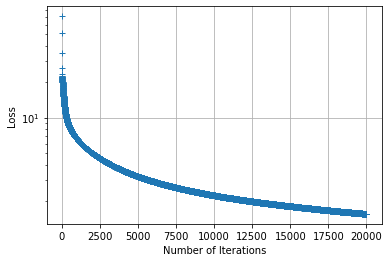

In [70]:
plt.plot(loss_history, "+")
plt.yscale("log")
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.grid(True)

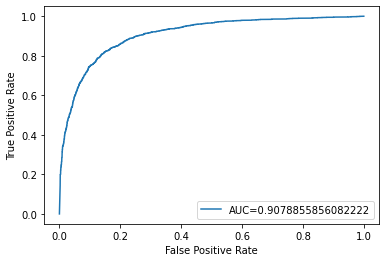

In [71]:
y_pred_proba = prediction_batch(beta, X_val_array)
fpr, tpr, _ = metrics.roc_curve(Y_val, y_pred_proba)
auc = metrics.roc_auc_score(Y_val, y_pred_proba)

# create ROC curve
plt.plot(fpr, tpr, label = "AUC=" + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 4)
plt.show()

# Stochastic Gradient Descent

In [24]:
# typo!!
# error(train) should be accuracy(train)
# error(val) should be accuracy(val)

In [27]:
n_epoch = 1000
minibatch_size = 5 #size of the minibatchs
N = len(X_train_array)  #15000, total number of images
img_indices = np.arange(N)

loss_history = []
loss_history_end_epoch = []
beta = np.copy(beta_init)
learning_rate = 0.000000005

for epoch in range(n_epoch):
    # go through all the minibatches, sequetially
    n_minibatch = N // minibatch_size + 1 # ensure that we're in the range [0,1]
    # randomize the batches
    np.random.shuffle(img_indices)
    
    all_loss_within_epoch = []
    for k in range(n_minibatch):
        # create the minibatch of examples
        batch_indices = np.arange(k*minibatch_size, (k+1)*minibatch_size) % N
        batch_indices = img_indices[batch_indices]
        X_minibatch = X_train_array[batch_indices]
        Y_minibatch = Y_train[batch_indices]

        # compute the stochastic gradient
        val, grad = loss_value_and_grad(beta, X_minibatch, Y_minibatch)

        # do one step of SGD
        beta = beta - learning_rate*grad

        # book-keeping
        loss_history.append(val)
        all_loss_within_epoch.append(val)
    loss_history_end_epoch.append(np.mean(all_loss_within_epoch))
    
    if epoch % 100 == 0:
        err_train = 100*compute_error_rate(beta, X_train_array, Y_train)
        err_val= 100*compute_error_rate(beta, X_val_array, Y_val)
        print(f"epoch:{epoch} \t Loss:{np.mean(all_loss_within_epoch):2.3f} \t error(train):{err_train:2.1f}% \t error(val):{err_val:2.1f}%")

epoch:0 	 Loss:19.018 	 error(train):54.1% 	 error(val):54.8%
epoch:100 	 Loss:4.317 	 error(train):72.8% 	 error(val):72.6%
epoch:200 	 Loss:3.054 	 error(train):77.5% 	 error(val):76.5%
epoch:300 	 Loss:2.493 	 error(train):80.2% 	 error(val):79.1%
epoch:400 	 Loss:2.164 	 error(train):82.0% 	 error(val):80.3%
epoch:500 	 Loss:1.940 	 error(train):83.3% 	 error(val):81.2%
epoch:600 	 Loss:1.771 	 error(train):84.2% 	 error(val):81.9%
epoch:700 	 Loss:1.642 	 error(train):84.7% 	 error(val):82.5%
epoch:800 	 Loss:1.541 	 error(train):85.5% 	 error(val):83.0%
epoch:900 	 Loss:1.456 	 error(train):86.0% 	 error(val):83.2%


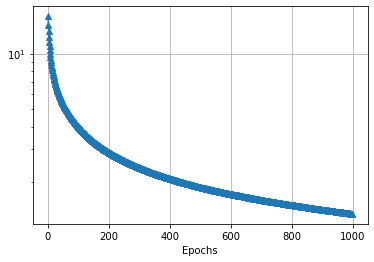

In [85]:
plt.plot(loss_history_end_epoch, "-^")
plt.yscale("log")
plt.xlabel("Epochs")
plt.grid(True)

# Task 2: Investigating the effect of the resolution of images on the accuracy

In [32]:
loss_history = []
loss_history_end_epoch = []

def run_SGD(minibatch_size, X, Y, beta_init, n_epoch, X_val_array, Y_val, resolution): 
    N = len(X)  #15000, total number of images
    img_indices = np.arange(N)

    loss_history_end_epoch = []
    beta = np.copy(beta_init)
    
    learning_rate = 0.000000005

    for epoch in range(n_epoch):
        # go through all the minibatches, sequetially
        n_minibatch = N // minibatch_size + 1 # ensure that we're in the range [0,1]
        # if minibatch is not random
        # one minibatch may only contain 1 type of data, bad approximation on dataset
        # in each epoch, the same bad minibatch will give a bad estimate
        
        # randomize the batches
        np.random.shuffle(img_indices)

        all_loss_within_epoch = []
        for k in range(n_minibatch):
            # create the minibatch of examples
            batch_indices = np.arange(k*minibatch_size, (k+1)*minibatch_size) % N
            batch_indices = img_indices[batch_indices]
            X_minibatch = X[batch_indices]
            Y_minibatch = Y[batch_indices]

            # compute the stochastic gradient
            val, grad = loss_value_and_grad(beta, X_minibatch, Y_minibatch)

            # do one step of SGD
            beta = beta - learning_rate*grad

            # book-keeping
            all_loss_within_epoch.append(val)
        loss_history_end_epoch.append(np.mean(all_loss_within_epoch)) 
        # compute loss over the whole epoch, less noisy
        
        if epoch % 200 == 0:
            err_train = 100*compute_error_rate(beta, X, Y)
            err_val= 100*compute_error_rate(beta, X_val_array, Y_val)
            print(f"epoch:{epoch} \t Resolution:{resolution} \t Loss:{np.mean(all_loss_within_epoch):2.3f} \t error(train):{err_train:2.1f}% \t error(val):{err_val:2.1f}%")
    
    err_train = 100*compute_error_rate(beta, X, Y)
    print("final train error: " + str(err_train))
    err_val= 100*compute_error_rate(beta, X_val_array, Y_val)
    print("final val error: " + str(err_val))
    
    return loss_history_end_epoch

Text(0.5, 1.0, '(20, 20)')

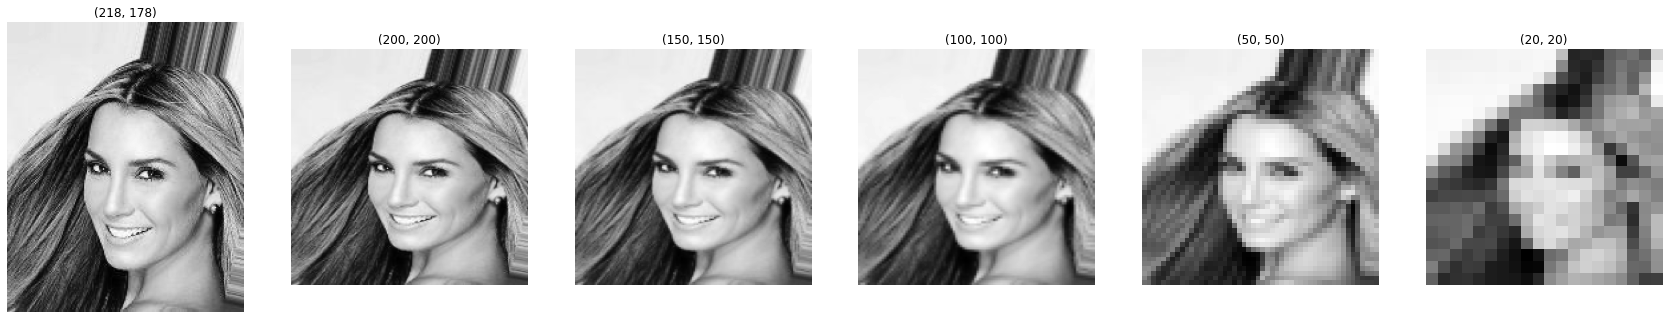

In [14]:
plt.figure(figsize=(50,50)) # (15,3) is the dimensions of the pic

im = imageio.imread(os.path.join(path, all_img[0])).astype(float)
im = np.mean(im, axis=2)# make plot black and white
plt.subplot(2,10,1)
plt.imshow(im/255., cmap="gray") 
plt.axis("off")
plt.title(im.shape)

im = resize(im, (200,200) ) # change size and resolution of images
plt.subplot(2,10,2)
plt.imshow(im/255., cmap="gray") 
plt.axis("off")
plt.title(im.shape)

im = resize(im, (150,150) ) # change size and resolution of images
plt.subplot(2,10,3)
plt.imshow(im/255., cmap="gray")
plt.axis("off")
plt.title(im.shape)

im = resize(im, (100,100) ) # change size and resolution of images
plt.subplot(2,10,4)
plt.imshow(im/255., cmap="gray")
plt.axis("off")
plt.title(im.shape)

im = resize(im, (50,50) ) # change size and resolution of images
plt.subplot(2,10,5)
plt.imshow(im/255., cmap="gray")
plt.axis("off")
plt.title(im.shape)

im = resize(im, (20,20) ) # change size and resolution of images
plt.subplot(2,10,6)
plt.imshow(im/255., cmap="gray")
plt.axis("off")
plt.title(im.shape)

Text(0.5, 1.0, '(200, 200)')

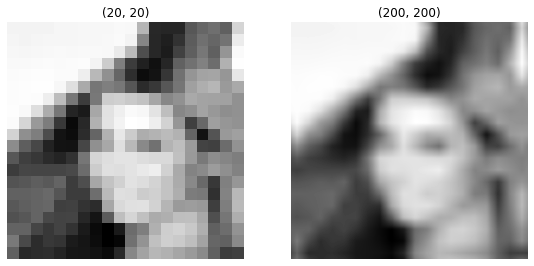

In [25]:
# Conclusion: can only go from a higher resolution to a lower resolution and not the other way
plt.figure(figsize=(50,50)) # (15,3) is the dimensions of the pic

im = imageio.imread(os.path.join(path, all_img[0])).astype(float)
im = np.mean(im, axis=2)# make plot black and white
im = resize(im, (20,20) ) # change size and resolution of images
plt.subplot(2,10,1)
plt.imshow(im/255., cmap="gray") 
plt.axis("off")
plt.title(im.shape)

im = resize(im, (200,200) ) # change size and resolution of images
plt.subplot(2,10,2)
plt.imshow(im/255., cmap="gray") 
plt.axis("off")
plt.title(im.shape)

In [28]:
n_train = 15000
n_val = 5000
images = []
val_images = []

#load the 15000 images - train dataset
for k in range(n_train):
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    im = np.mean(im, axis=2) # average the last channel, make images black and white
    images.append(im)

#load the last 5000 images - test dataset
for g in range(15000, 15000 + n_val): # test dataset consists of images with index 15000 to 19999 (inclusive), or 20000 (exclusive)
    im = imageio.imread(os.path.join(path, all_img[g])).astype(float)
    im = np.mean(im, axis=2) # average the last channel
    val_images.append(im)

In [29]:
Y_train = np.asarray(attribute["Male"][:n_train])
Y_train.shape
Y_val = np.asarray(attribute["Male"][15000: 15000 + n_val])
Y_val.shape

(5000,)

In [ ]:
# typo!!
# error(train) should be accuracy(train)
# error(val) should be accuracy(val)

epoch:0 	 Resolution:(200*200) 	 Loss:17.715 	 error(train):52.5% 	 error(val):53.8%
epoch:200 	 Resolution:(200*200) 	 Loss:1.629 	 error(train):84.5% 	 error(val):84.0%
epoch:400 	 Resolution:(200*200) 	 Loss:1.150 	 error(train):87.9% 	 error(val):85.7%
epoch:600 	 Resolution:(200*200) 	 Loss:0.903 	 error(train):89.2% 	 error(val):86.1%
epoch:800 	 Resolution:(200*200) 	 Loss:0.743 	 error(train):90.1% 	 error(val):86.1%
epoch:1000 	 Resolution:(200*200) 	 Loss:0.625 	 error(train):90.2% 	 error(val):85.9%
epoch:1200 	 Resolution:(200*200) 	 Loss:0.532 	 error(train):90.4% 	 error(val):86.1%
epoch:1400 	 Resolution:(200*200) 	 Loss:0.458 	 error(train):91.7% 	 error(val):86.1%
final train error: 92.30000000000001
final val error: 86.04
epoch:0 	 Resolution:(150*150) 	 Loss:17.471 	 error(train):52.7% 	 error(val):52.2%
epoch:200 	 Resolution:(150*150) 	 Loss:2.183 	 error(train):82.0% 	 error(val):81.2%
epoch:400 	 Resolution:(150*150) 	 Loss:1.532 	 error(train):85.3% 	 error(val)

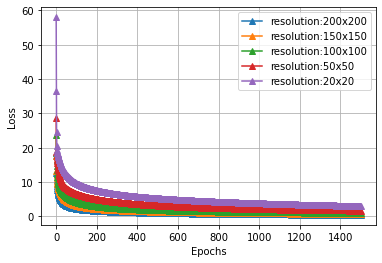

In [47]:
minibatch_size = 5
n_epoch = 1500

for res in [200, 150, 100, 50, 20]:
    X = np.zeros((n_train, res, res))
    for m in range(n_train):
        im = resize(images[m], (res,res) )
        X[m,:,:] = im
    
    X_val_array = np.zeros((n_val, res, res))
    for n in range(15000, 15000 + n_val):
        val_im = resize(val_images[n-15000], (res,res) )
        X_val_array[n - 15000,:,:] = val_im
        
    X = X.reshape(n_train, res*res)
    X_val_array = X_val_array.reshape(n_val, res*res)
    
    np.random.seed(1)
    beta_init = np.random.normal(0,scale=1/np.sqrt(res*res),size=(res*res))
    beta = np.copy(beta_init)
    # run SGD
    p_res = "(" + str(res) + "*" + str(res) + ")"
    loss_history_end_epoch = run_SGD(minibatch_size, X, Y_train, beta, n_epoch, X_val_array, Y_val, p_res)
    
    plt.plot(loss_history_end_epoch, 
             "-^",
             label=f"resolution:{res}x{res}") 
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)

In [30]:
import time

In [ ]:
# typo!!
# error(train) should be accuracy(train)
# error(val) should be accuracy(val)

epoch:0 	 Resolution:(200*200) 	 Loss:17.715 	 error(train):52.5% 	 error(val):53.8%
final train error: 81.02000000000001
final val error: 80.98
epoch:0 	 Resolution:(150*150) 	 Loss:17.471 	 error(train):52.7% 	 error(val):52.2%
final train error: 77.32
final val error: 77.04
epoch:0 	 Resolution:(100*100) 	 Loss:23.763 	 error(train):50.8% 	 error(val):49.5%
final train error: 72.54
final val error: 73.08
epoch:0 	 Resolution:(50*50) 	 Loss:28.787 	 error(train):53.3% 	 error(val):54.6%
final train error: 63.82666666666667
final val error: 65.24
epoch:0 	 Resolution:(20*20) 	 Loss:58.013 	 error(train):42.4% 	 error(val):42.4%
final train error: 55.60000000000001
final val error: 55.78000000000001


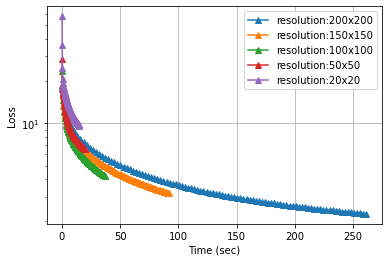

In [34]:
minibatch_size = 5
n_epoch = 100

for res in [200, 150, 100, 50, 20]:
    X = np.zeros((n_train, res, res))
    for m in range(n_train):
        im = resize(images[m], (res,res) )
        X[m,:,:] = im
    
    X_val_array = np.zeros((n_val, res, res))
    for n in range(15000, 15000 + n_val):
        val_im = resize(val_images[n-15000], (res,res) )
        X_val_array[n - 15000,:,:] = val_im
        
    X = X.reshape(n_train, res*res)
    X_val_array = X_val_array.reshape(n_val, res*res)
    
    np.random.seed(1)
    beta_init = np.random.normal(0,scale=1/np.sqrt(res*res),size=(res*res))
    beta = np.copy(beta_init)
    # run SGD
    start = time.time()
    
    p_res = "(" + str(res) + "*" + str(res) + ")"
    loss_history_end_epoch = run_SGD(minibatch_size, X, Y_train, beta, n_epoch, X_val_array, Y_val, p_res)
    
    end=time.time()
    # plot with time on the x-axis
    time_per_epoch = (end-start) / n_epoch
    
    plt.plot(np.arange(100)*time_per_epoch, # take time into account
             loss_history_end_epoch, 
             "-^",
             label=f"resolution:{res}x{res}") 
plt.legend()
plt.xlabel("Time (sec)")
plt.ylabel("Loss")
plt.yscale("log")
plt.grid(True)

# Task 7: First 200 images

7. Suppose now that you can only use 1% of the data, i.e. only the first 200 images, to train your model. What is the best model you can come up with? Is it helpful to use data-augmentation strategies? Is it helpful to use regularization strategies? Ensembling? Report the error rate and AUC of your best model (when evaluated on the last 5,000 images).

In [25]:
# load the first 200 images
n_train_first = 200
X_train_first = np.zeros((n_train_first, 218, 178, 3))
for k in range(n_train_first):
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    X_train_first[k,:,:,:] = im
    
X_train_first = X_train_first.reshape(n_train_first, 218*178*3)

Y_train_first = np.asarray(attribute["Male"][:n_train_first])

In [26]:
#load the last 5000 images - test dataset
n_val = 5000
X_val_array = np.zeros((n_val, 218, 178, 3))
for k in range(15000, 15000 + n_val): # test dataset consists of images with index 15000 to 19999 (inclusive), or 20000 (exclusive)
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    X_val_array[k - 15000,:,:,:] = im
    
X_val_array = X_val_array.reshape(n_val, 218*178*3)

Y_val = np.asarray(attribute["Male"][15000: 15000 + n_val])

In [49]:
def run_SGD(minibatch_size, X, Y, beta_init, n_epoch, X_val_array, Y_val): 
    N = len(X)  #15000, total number of images
    img_indices = np.arange(N)

    loss_history_end_epoch = []
    beta = np.copy(beta_init)
    
    learning_rate = 0.000000005

    for epoch in range(n_epoch):
        # go through all the minibatches, sequetially
        n_minibatch = N // minibatch_size + 1 # ensure that we're in the range [0,1]
        # if minibatch is not random
        # one minibatch may only contain 1 type of data, bad approximation on dataset
        # in each epoch, the same bad minibatch will give a bad estimate
        
        # randomize the batches
        np.random.shuffle(img_indices)

        all_loss_within_epoch = []
        for k in range(n_minibatch):
            # create the minibatch of examples
            batch_indices = np.arange(k*minibatch_size, (k+1)*minibatch_size) % N
            batch_indices = img_indices[batch_indices]
            X_minibatch = X[batch_indices]
            Y_minibatch = Y[batch_indices]

            # compute the stochastic gradient
            val, grad = loss_value_and_grad(beta, X_minibatch, Y_minibatch)

            # do one step of SGD
            beta = beta - learning_rate*grad

            # book-keeping
            all_loss_within_epoch.append(val)
        loss_history_end_epoch.append(np.mean(all_loss_within_epoch)) 
        # compute loss over the whole epoch, less noisy
        
        if epoch % 200 == 0:
            err_train = 100*compute_error_rate(beta, X, Y)
            err_val= 100*compute_error_rate(beta, X_val_array, Y_val)
            print(f"epoch:{epoch} \t Loss:{np.mean(all_loss_within_epoch):2.3f} \t error(train):{err_train:2.1f}% \t error(val):{err_val:2.1f}%")
            
    err_train = 100*compute_error_rate(beta, X, Y)
    print("final train error: " + str(err_train))
    err_val= 100*compute_error_rate(beta, X_val_array, Y_val)
    print("final val error: " + str(err_val))
    return loss_history_end_epoch

In [ ]:
# typo!!
# error(train) should be accuracy(train)
# error(val) should be accuracy(val)

epoch:0 	 Loss:37.450 	 error(train):52.0% 	 error(val):53.9%
epoch:200 	 Loss:1.637 	 error(train):84.0% 	 error(val):66.5%
epoch:400 	 Loss:0.267 	 error(train):97.0% 	 error(val):67.0%
epoch:600 	 Loss:0.009 	 error(train):100.0% 	 error(val):67.6%
epoch:800 	 Loss:0.004 	 error(train):100.0% 	 error(val):67.8%
epoch:1000 	 Loss:0.003 	 error(train):100.0% 	 error(val):67.9%
epoch:1200 	 Loss:0.002 	 error(train):100.0% 	 error(val):67.9%
epoch:1400 	 Loss:0.002 	 error(train):100.0% 	 error(val):67.9%
final train error: 100.0


final val error: 67.96


Text(0.5, 1.0, 'SGD on first 200 input images')

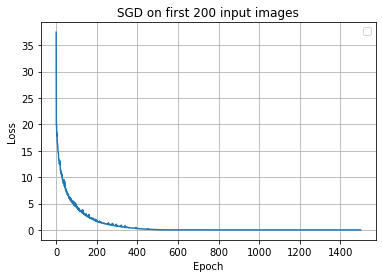

In [105]:
minibatch_size = 5
n_epoch = 1500

np.random.seed(1)
beta_init = np.random.normal(0,scale=1/np.sqrt(218*178*3),size=(218*178*3))
beta = np.copy(beta_init)

# run SGD
loss_history_end_epoch = run_SGD(minibatch_size, X_train_first, Y_train_first, beta, n_epoch, X_val_array, Y_val)

plt.plot(loss_history_end_epoch) 
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.title("SGD on first 200 input images")

## Data Augmentation with Numpy (Flip/Rotate/Blur)

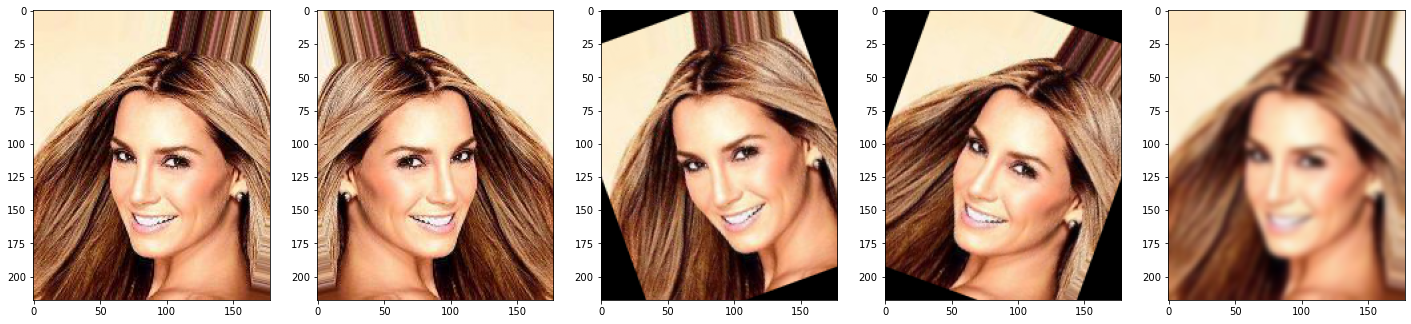

In [41]:
plt.figure(figsize=(50,50))
im = imageio.imread(os.path.join(path, all_img[0])).astype(float)
plt.subplot(2,10,1)
plt.imshow(im/255., cmap="gray")

im2 = np.fliplr(im)
plt.subplot(2,10,2)
plt.imshow(im2/255., cmap="gray") 

im3 = rotate(im, angle = 20)
plt.subplot(2,10,3)
plt.imshow(im3/255., cmap="gray") 

im4 = rotate(im, angle = - 20)
plt.subplot(2,10,4)
plt.imshow(im4/255., cmap="gray") 

b_im = cv2.GaussianBlur(im, (11,11), 0)
plt.subplot(2,10,5)
plt.imshow(b_im/255., cmap="gray") 

In [42]:
X_train_first_f = np.zeros((n_train_first, 218, 178, 3))
for k in range(n_train_first):
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    im2 = np.fliplr(im)
    X_train_first_f[k,:,:,:] = im2
    
X_train_first_f = X_train_first_f.reshape(n_train_first, 218*178*3)

In [43]:
X_train_first_rc = np.zeros((n_train_first, 218, 178, 3))
for k in range(n_train_first):
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    im2 = rotate(im, angle = 20)
    X_train_first_rc[k,:,:,:] = im2
X_train_first_rc = X_train_first_rc.reshape(n_train_first, 218*178*3)

X_train_first_rac = np.zeros((n_train_first, 218, 178, 3))
for k in range(n_train_first):
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    im2 = rotate(im, angle = - 20)
    X_train_first_rac[k,:,:,:] = im2
X_train_first_rac = X_train_first_rac.reshape(n_train_first, 218*178*3)

In [44]:
X_train_first_b = np.zeros((n_train_first, 218, 178, 3))
for k in range(n_train_first):
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    b_im = cv2.GaussianBlur(im, (11,11), 0)
    X_train_first_b[k,:,:,:] = b_im
    
X_train_first_b = X_train_first_b.reshape(n_train_first, 218*178*3)

In [45]:
X_train_first_aug = np.concatenate([X_train_first, X_train_first_f, X_train_first_rc, X_train_first_rac, X_train_first_b], axis = 0)
X_train_first_aug.shape

(1000, 116412)

In [46]:
Y_train_first_aug = np.concatenate([Y_train_first, Y_train_first, Y_train_first, Y_train_first, Y_train_first], axis = 0)
Y_train_first_aug.shape

(1000,)

In [47]:
# typo!!
# error(train) should be accuracy(train)
# error(val) should be accuracy(val)

epoch:0 	 Loss:22.886 	 error(train):56.5% 	 error(val):55.7%
epoch:200 	 Loss:1.054 	 error(train):88.7% 	 error(val):72.0%
epoch:400 	 Loss:0.216 	 error(train):96.8% 	 error(val):72.7%
epoch:600 	 Loss:0.038 	 error(train):99.4% 	 error(val):73.5%
epoch:800 	 Loss:0.009 	 error(train):100.0% 	 error(val):73.7%
epoch:1000 	 Loss:0.005 	 error(train):100.0% 	 error(val):73.8%
epoch:1200 	 Loss:0.004 	 error(train):100.0% 	 error(val):73.9%
epoch:1400 	 Loss:0.003 	 error(train):100.0% 	 error(val):74.0%
final train error: 100.0
final val error: 73.96000000000001


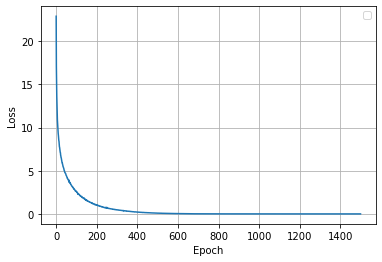

In [50]:
minibatch_size = 5
n_epoch = 1500
beta = np.copy(beta_init)
# run SGD
loss_history_end_epoch = run_SGD(minibatch_size, X_train_first_aug, Y_train_first_aug, beta, n_epoch, X_val_array, Y_val)

plt.plot(loss_history_end_epoch) 
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

## Data Augmentation with Keras (Not used)

In [35]:
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

In [36]:
#Data Augmentation
train_data_gen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    horizontal_flip=True,
    shear_range=0.2,        
    zoom_range=0.3,               
    fill_mode='nearest')

In [40]:
path = "/Users/suningquek/Documents/Y3S2/DSA4212/Datasets/img_celeba_small"

n_train_first = 200
X_train_first_augk = np.zeros((n_train_first, 218, 178, 3))
for k in range(n_train_first):
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    X_train_first_augk[k,:,:,:] = im
    
#X_train_first = X_train_first.reshape(n_train_first, 218*178*3)

Y_train_first_augk = np.copy(Y_train_first)

In [41]:
train_data_gen.fit(X_train_first_augk)

In [42]:
## testing
path = "/Users/suningquek/Documents/Y3S2/DSA4212/Datasets/img_celeba_small"

train_data_first = train_data_gen.flow(X_train_first_augk, Y_train_first_augk, batch_size=500, sample_weight=None, shuffle=True)

                                #save_to_dir= path + '/augmented', # to visualise the augmented images
                                #save_prefix='aug', save_format='jpg', subset=None)

In [46]:
def run_SGD(minibatch_size, X, Y, beta_init, n_epoch, X_val_array, Y_val): 
    N = len(X) 
    img_indices = np.arange(N)

    loss_history_end_epoch = []
    beta = np.copy(beta_init)
    learning_rate = 0.000000005
    train_data_first = train_data_gen.flow(X, Y, batch_size=500, sample_weight=None, shuffle=True)
    
    for epoch in range(n_epoch):
        if epoch % 500 == 0:
            X, Y = next(train_data_first)
            X = X.reshape(n_train_first, 218*178*3)
        
        # go through all the minibatches, sequetially
        n_minibatch = N // minibatch_size + 1 # ensure that we're in the range [0,1]
        # if minibatch is not random, one minibatch may only contain 1 type of data, bad approximation on dataset
        # in each epoch, the same bad minibatch will give a bad estimate
        
        # randomize the batches
        np.random.shuffle(img_indices)
    
        all_loss_within_epoch = []
        for k in range(n_minibatch):
            # create the minibatch of examples
            batch_indices = np.arange(k*minibatch_size, (k+1)*minibatch_size) % N
            batch_indices = img_indices[batch_indices]
            X_minibatch = X[batch_indices]
            Y_minibatch = Y[batch_indices]

            # compute the stochastic gradient
            val, grad = loss_value_and_grad(beta, X_minibatch, Y_minibatch)

            # do one step of SGD
            beta = beta - learning_rate*grad

            # book-keeping
            all_loss_within_epoch.append(val)
        loss_history_end_epoch.append(np.mean(all_loss_within_epoch)) 
        # compute loss over the whole epoch, less noisy
        
        if epoch % 200 == 0:
            err_train = 100*compute_error_rate(beta, X, Y)
            err_val= 100*compute_error_rate(beta, X_val_array, Y_val)
            print(f"epoch:{epoch} \t Loss:{np.mean(all_loss_within_epoch):2.3f} \t error(train):{err_train:2.1f}% \t error(val):{err_val:2.1f}%")
            
    err_train = 100*compute_error_rate(beta, X, Y)
    print("final train error: " + str(err_train))
    err_val= 100*compute_error_rate(beta, X_val_array, Y_val)
    print("final val error: " + str(err_val))
    return loss_history_end_epoch

In [ ]:
# typo!!
# error(train) should be accuracy(train)
# error(val) should be accuracy(val)

epoch:0 	 Loss:32.457 	 error(train):58.0% 	 error(val):53.2%
epoch:200 	 Loss:1.826 	 error(train):82.0% 	 error(val):59.9%
epoch:400 	 Loss:0.308 	 error(train):97.5% 	 error(val):60.6%
epoch:600 	 Loss:3.007 	 error(train):80.5% 	 error(val):61.0%
epoch:800 	 Loss:0.404 	 error(train):94.5% 	 error(val):60.3%
epoch:1000 	 Loss:9.898 	 error(train):61.5% 	 error(val):60.4%
epoch:1200 	 Loss:1.196 	 error(train):86.0% 	 error(val):64.2%
epoch:1400 	 Loss:0.140 	 error(train):99.0% 	 error(val):64.8%
epoch:1600 	 Loss:3.483 	 error(train):78.0% 	 error(val):65.5%
epoch:1800 	 Loss:0.489 	 error(train):92.5% 	 error(val):65.3%
epoch:2000 	 Loss:10.813 	 error(train):57.0% 	 error(val):63.8%
epoch:2200 	 Loss:1.049 	 error(train):88.0% 	 error(val):65.0%
epoch:2400 	 Loss:0.047 	 error(train):99.5% 	 error(val):64.6%
final train error: 100.0


final val error: 64.58


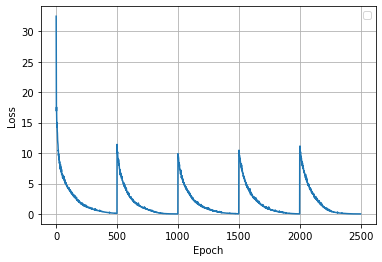

In [47]:
minibatch_size = 5
n_epoch = 2500
loss_history_end_epoch = []

np.random.seed(1)
beta_init = np.random.normal(0,scale=1/np.sqrt(218*178*3),size=(218*178*3))
beta = np.copy(beta_init)

# run SGD
loss_history_end_epoch = run_SGD(minibatch_size, X_train_first_augk, Y_train_first_augk, beta, n_epoch, X_val_array, Y_val)

plt.plot(loss_history_end_epoch) 
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

## Regularization

In [24]:
# load the first 200 images
n_train_first = 200
X_train_first = np.zeros((n_train_first, 218, 178, 3))
for k in range(n_train_first):
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    X_train_first[k,:,:,:] = im
    
X_train_first = X_train_first.reshape(n_train_first, 218*178*3)

Y_train_first = np.asarray(attribute["Male"][:n_train_first])

### Ridge Logistic Regression

In [39]:
def run_SGD_ridge(minibatch_size, X, Y, beta_init, n_epoch, X_val_array, Y_val, lam): 
    N = len(X)
    img_indices = np.arange(N)

    loss_history_end_epoch = []
    beta = np.copy(beta_init)
    
    learning_rate = 0.000000005

    for epoch in range(n_epoch):
        # go through all the minibatches, sequetially
        n_minibatch = N // minibatch_size + 1 # ensure that we're in the range [0,1]
        # if minibatch is not random
        # one minibatch may only contain 1 type of data, bad approximation on dataset
        # in each epoch, the same bad minibatch will give a bad estimate
        
        # randomize the batches
        np.random.shuffle(img_indices)

        all_loss_within_epoch = []
        for k in range(n_minibatch):
            # create the minibatch of examples
            batch_indices = np.arange(k*minibatch_size, (k+1)*minibatch_size) % N
            batch_indices = img_indices[batch_indices]
            X_minibatch = X[batch_indices]
            Y_minibatch = Y[batch_indices]

            # compute the stochastic gradient
            val, grad = loss_value_and_grad_reg(beta, X_minibatch, Y_minibatch, lam)

            # do one step of SGD
            beta = beta - learning_rate*grad

            # book-keeping
            all_loss_within_epoch.append(val)
        loss_history_end_epoch.append(np.mean(all_loss_within_epoch)) 
        # compute loss over the whole epoch, less noisy
        
        if epoch % 200 == 0:
            #print(beta)
            err_train = 100*compute_error_rate(beta, X, Y)
            err_val= 100*compute_error_rate(beta, X_val_array, Y_val)
            print(f"epoch:{epoch} \t Lambda:{lam} \t Loss:{np.mean(all_loss_within_epoch):2.3f} \t error(train):{err_train:2.1f}% \t error(val):{err_val:2.1f}%")
    
    err_train = 100*compute_error_rate(beta, X, Y)
    print("final train error: " + str(err_train))
    err_val= 100*compute_error_rate(beta, X_val_array, Y_val)
    print("final val error: " + str(err_val))
    return (loss_history_end_epoch, beta)

In [ ]:
# typo!!
# error(train) should be accuracy(train)
# error(val) should be accuracy(val)

epoch:0 	 Lambda:0.5 	 Loss:7674.284 	 error(train):57.5% 	 error(val):58.1%
epoch:200 	 Lambda:0.5 	 Loss:0.537 	 error(train):100.0% 	 error(val):75.0%
epoch:400 	 Lambda:0.5 	 Loss:0.511 	 error(train):100.0% 	 error(val):75.0%
final train error: 100.0
final val error: 74.96000000000001
epoch:0 	 Lambda:1.0 	 Loss:7674.782 	 error(train):57.5% 	 error(val):58.1%
epoch:200 	 Lambda:1.0 	 Loss:1.042 	 error(train):100.0% 	 error(val):75.0%
epoch:400 	 Lambda:1.0 	 Loss:1.012 	 error(train):100.0% 	 error(val):75.0%
final train error: 100.0
final val error: 74.98
epoch:0 	 Lambda:1.5 	 Loss:7675.281 	 error(train):57.5% 	 error(val):58.1%
epoch:200 	 Lambda:1.5 	 Loss:1.537 	 error(train):100.0% 	 error(val):75.3%
epoch:400 	 Lambda:1.5 	 Loss:1.511 	 error(train):100.0% 	 error(val):75.3%
final train error: 100.0
final val error: 75.4
epoch:0 	 Lambda:5.0 	 Loss:7678.770 	 error(train):57.5% 	 error(val):58.1%
epoch:200 	 Lambda:5.0 	 Loss:5.024 	 error(train):100.0% 	 error(val):75.6

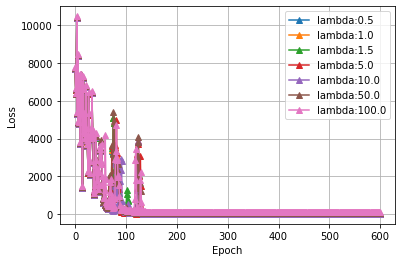

In [65]:
minibatch_size = 100
n_epoch = 600

lam_arr = np.array([0.5, 1, 1.5, 5, 10, 50, 100])

# run SGD
for lam in lam_arr:
    np.random.seed(1)
    beta_init = np.random.normal(0,scale=1/np.sqrt(218*178*3),size=(218*178*3))
    beta = np.copy(beta_init)
    loss_history_end_epoch = run_SGD_ridge(minibatch_size, X_train_first, Y_train_first, beta, n_epoch, X_val_array, Y_val, lam)[0]

    plt.plot(loss_history_end_epoch, 
             "-^",
             label=f"lambda:{lam}") 
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

### Lasso Logistic Regression

In [35]:
def run_SGD_lasso(minibatch_size, X, Y, beta_init, n_epoch, X_val_array, Y_val, lam): 
    N = len(X)  #15000, total number of images
    img_indices = np.arange(N)

    loss_history_end_epoch = []
    beta = np.copy(beta_init)
    
    learning_rate = 0.000000005

    for epoch in range(n_epoch):
        # go through all the minibatches, sequetially
        n_minibatch = N // minibatch_size + 1 # ensure that we're in the range [0,1]
        # if minibatch is not random
        # one minibatch may only contain 1 type of data, bad approximation on dataset
        # in each epoch, the same bad minibatch will give a bad estimate
        
        # randomize the batches
        np.random.shuffle(img_indices)

        all_loss_within_epoch = []
        for k in range(n_minibatch):
            # create the minibatch of examples
            batch_indices = np.arange(k*minibatch_size, (k+1)*minibatch_size) % N
            batch_indices = img_indices[batch_indices]
            X_minibatch = X[batch_indices]
            Y_minibatch = Y[batch_indices]

            # compute the stochastic gradient
            val, grad = loss_value_and_grad_lasso(beta, X_minibatch, Y_minibatch, lam)

            # do one step of SGD
            beta = beta - learning_rate*grad

            # book-keeping
            all_loss_within_epoch.append(val)
        loss_history_end_epoch.append(np.mean(all_loss_within_epoch)) 
        # compute loss over the whole epoch, less noisy
        
        if epoch % 200 == 0:
            err_train = 100*compute_error_rate(beta, X, Y)
            err_val= 100*compute_error_rate(beta, X_val_array, Y_val)
            print(f"epoch:{epoch} \t Lambda:{lam} \t Loss:{np.mean(all_loss_within_epoch):2.3f} \t error(train):{err_train:2.1f}% \t error(val):{err_val:2.1f}%")
    
    err_train = 100*compute_error_rate(beta, X, Y)
    print("final train error: " + str(err_train))
    err_val= 100*compute_error_rate(beta, X_val_array, Y_val)
    print("final val error: " + str(err_val))
    return loss_history_end_epoch

In [ ]:
# typo!!
# error(train) should be accuracy(train)
# error(val) should be accuracy(val)

epoch:0 	 Lambda:0.5 	 Loss:7809.645 	 error(train):57.5% 	 error(val):58.1%
epoch:200 	 Lambda:0.5 	 Loss:135.980 	 error(train):100.0% 	 error(val):75.5%
epoch:400 	 Lambda:0.5 	 Loss:135.884 	 error(train):100.0% 	 error(val):75.5%
final train error: 100.0
final val error: 75.48
epoch:0 	 Lambda:1.0 	 Loss:7945.504 	 error(train):57.5% 	 error(val):58.1%
epoch:200 	 Lambda:1.0 	 Loss:271.798 	 error(train):100.0% 	 error(val):75.5%
epoch:400 	 Lambda:1.0 	 Loss:271.432 	 error(train):100.0% 	 error(val):75.5%
final train error: 100.0
final val error: 75.58
epoch:0 	 Lambda:1.5 	 Loss:8081.364 	 error(train):57.5% 	 error(val):58.1%
epoch:200 	 Lambda:1.5 	 Loss:407.337 	 error(train):100.0% 	 error(val):75.2%
epoch:400 	 Lambda:1.5 	 Loss:406.532 	 error(train):100.0% 	 error(val):75.2%
final train error: 100.0
final val error: 75.24000000000001
epoch:0 	 Lambda:5.0 	 Loss:9032.370 	 error(train):57.5% 	 error(val):58.1%
epoch:200 	 Lambda:5.0 	 Loss:1351.919 	 error(train):100.0% 	

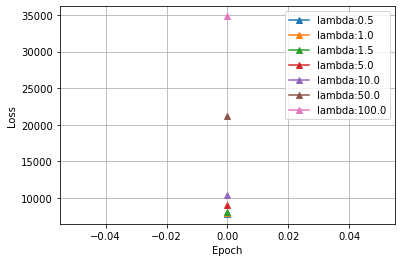

In [37]:
minibatch_size = 100
n_epoch = 600

lam_arr = np.array([0.5, 1, 1.5, 5, 10, 50, 100])

# run SGD
for lam in lam_arr:
    np.random.seed(1)
    beta_init = np.random.normal(0,scale=1/np.sqrt(218*178*3),size=(218*178*3))
    beta = np.copy(beta_init)
    loss_history_end_epoch = run_SGD_lasso(minibatch_size, X_train_first, Y_train_first, beta, n_epoch, X_val_array, Y_val, lam)[0]

    plt.plot(loss_history_end_epoch, 
             "-^",
             label=f"lambda:{lam}") 
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

## Best Model

In [ ]:
# typo!!
# error(train) should be accuracy(train)
# error(val) should be accuracy(val)

epoch:0 	 Lambda:5 	 Loss:5687.074 	 error(train):42.6% 	 error(val):42.1%
epoch:200 	 Lambda:5 	 Loss:23.100 	 error(train):98.4% 	 error(val):80.7%
epoch:400 	 Lambda:5 	 Loss:5.044 	 error(train):100.0% 	 error(val):80.9%
epoch:600 	 Lambda:5 	 Loss:5.037 	 error(train):100.0% 	 error(val):80.9%
final train error: 100.0
final val error: 81.0


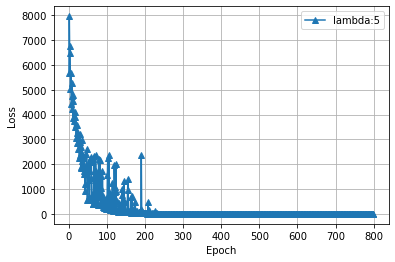

In [51]:
# Ridge logistic regression on a specific lambda
minibatch_size = 100
n_epoch = 800
np.random.seed(1)
beta_init = np.random.normal(0,scale=1/np.sqrt(218*178*3),size=(218*178*3))
beta = np.copy(beta_init)

# run SGD
res = run_SGD_ridge(minibatch_size, X_train_first_aug, Y_train_first_aug, beta, n_epoch, X_val_array, Y_val, 5)
loss_history_end_epoch = res[0]
best_beta = res[1]
plt.plot(loss_history_end_epoch, 
        "-^",
         label=f"lambda:{5}") 

plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

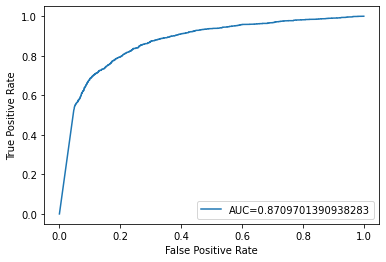

In [52]:
y_pred_proba = prediction_batch(best_beta, X_val_array)
fpr, tpr, _ = metrics.roc_curve(Y_val, y_pred_proba)
auc = metrics.roc_auc_score(Y_val, y_pred_proba)

# create ROC curve
plt.plot(fpr, tpr, label = "AUC=" + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 4)
plt.show()